<a href="https://colab.research.google.com/github/Mokpo-INFO-AIClass/class_materials/blob/main/3_1_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

[Colab 에서 실행하기](https://colab.research.google.com/drive/13Opl_JW25FOxJ-zizqXH_t7x-mSlGyg8#scrollTo=WHZssccyWzPl)

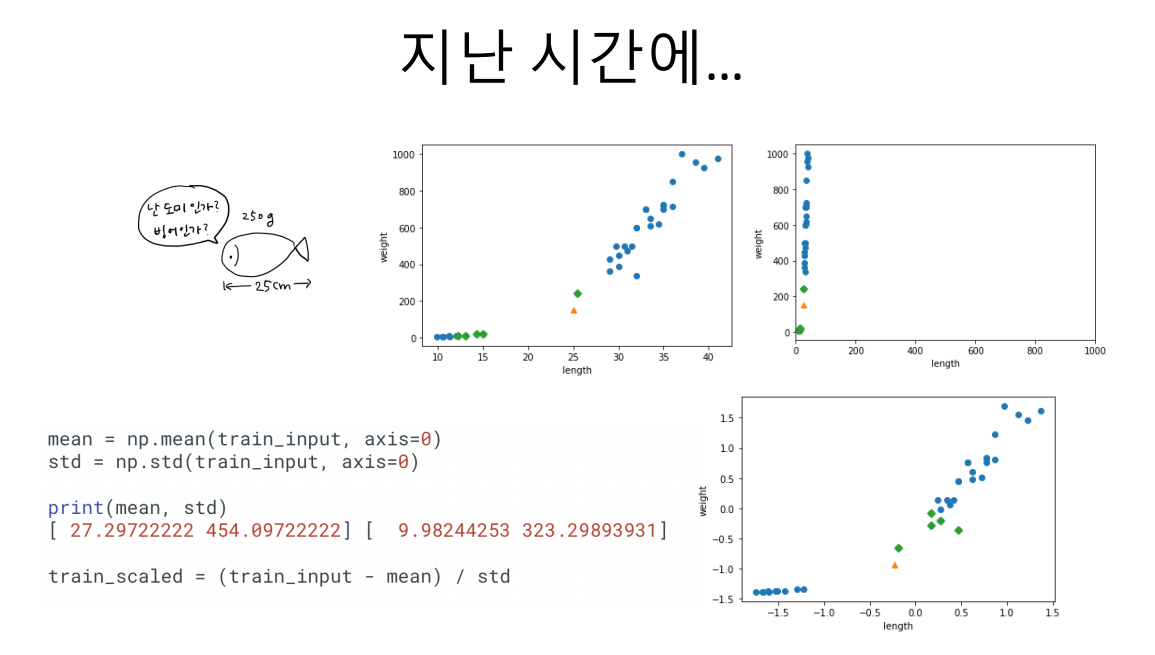

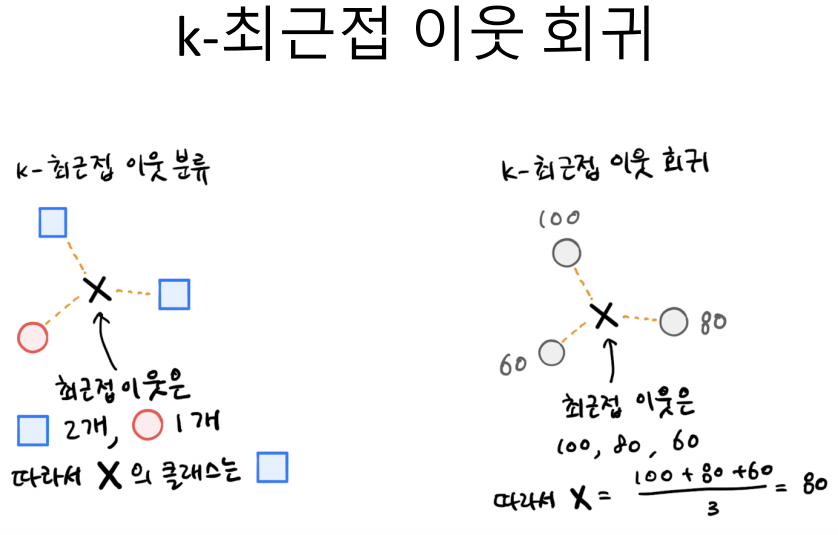

# ***오늘의 문제 : 농어 무게를 예측*** 

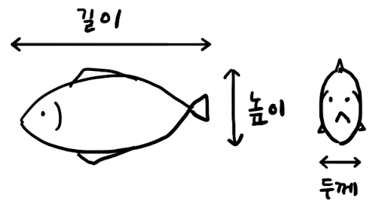

### 데이터 준비 : `농어 길이와 무게 데이터 확보` 하여 길이 와 무게 관계를 모델링 한 후 새로운 길이 데이터에 대한 무게를 예측 하는 문제 

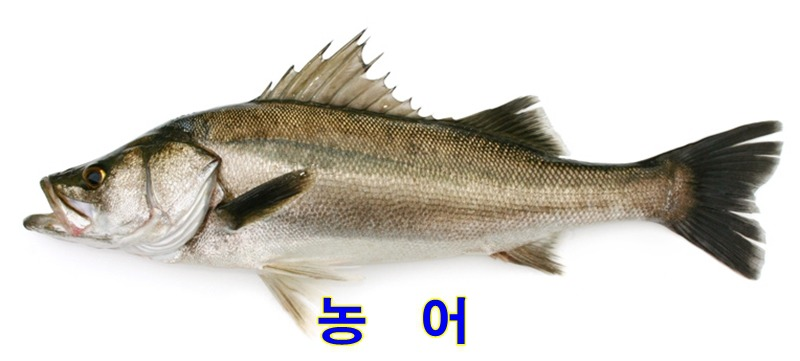

In [2]:
import numpy as np

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
import matplotlib.pyplot as plt

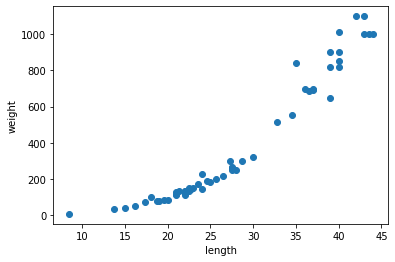

In [5]:
plt.scatter(perch_length, perch_weight) 
plt.xlabel('length')
plt.ylabel('weight')
##plt.xlim (0, 1000)       ## X 축 스케일링 0 ,, 1000 까지 그려 보기 
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [15]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [14]:
##print (train_input , '\n\n' , test_input )         ## 직접 데이터 출력 해보기 


## **Numpy array 의 shape 이해하기** Example


In [18]:
test_array = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(test_array.shape)

(3, 4)



# **reshape 이해하기** 

In [47]:
test_array = test_array.reshape(4, 3)   ## 4x3 = 12 ( test_array 12개 원소 )
print(test_array.shape)
print('\n')
print (test_array)  ## test_array reshape 후 출력 해보기

(4, 3)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [45]:
#test_array = test_array.reshape(12,1)   ## 12x1 = 12 ( test_array 12개 원소 )
#print(test_array.shape)
#print('\n')
#print (test_array)  ## test_array reshape 후 출력 해보기

In [46]:
#test_array = test_array.reshape(2, 6)   ## 2x6 = 12 ( test_array 12개 원소 )
#print(test_array.shape)
#print('\n')
#print (test_array)  ## test_array reshape 후 출력 해보기

In [49]:
#test_array = test_array.reshape(4, 2)   ## 4x2 = 8 != 12 ( test_array 12개 원소 )
#print(test_array.shape)
#print('\n')
#print (test_array)  ## test_array reshape 후 출력 해보기

In [30]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
#######test_array = test_array.reshape(3, 3)

*reshape ( ) 에 -1 인 경우 ( 모든 요소는 -1 이다. )* 
원래 -1 배열의 인덱스 는 없다.

In [69]:
x = np.arange(12)
#print (x); print ('\n')
#print (x.reshape(-1)) ; print ('\n')
x = x.reshape(3,4)
#print (x)

In [62]:
#print ( x.reshape(-1,1) )  ## 2,3,4,5,6,... 등을 넣어 본다. 에러 발생은 어떤 수?

In [66]:
#print ( x.reshape(1,-1) )   ## 2,3,4,5,6,.. 등을 넣어 본다. 에러 발생은 어떤 수? 

# **2차원 배열로 reshape**  ( scikit-learn 훈련데이터는 2차원 배열로 처리 함으로)

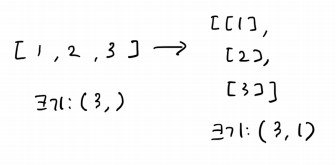

In [32]:
train_input = train_input.reshape(-1, 1)  ## -1 은 모든 원소를 나열 (가변적인 경우도 OK)
test_input = test_input.reshape(-1, 1)

In [33]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [34]:
##print ( train_input , "\n\n", test_input )         ## 직접 데이터 출력 해보기 

## 결정 계수 ($ R^2$)

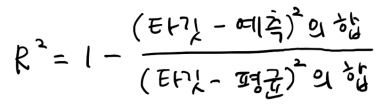

R squared (**2) 에서 분자는 오차의 크기정도를 분모는 실재 값의 편차 정도를 나타낸다.  

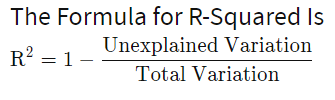

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knr = KNeighborsRegressor ()
# knr = KNeighborsRegressor( n_neighbors=2)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

score() 함수를 이용 R**2 를 구한다. 

In [37]:
knr.score(test_input, test_target)

0.9928094061010639

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


MAE = Mean Absolute Error 

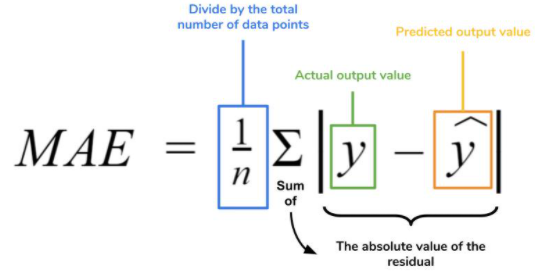

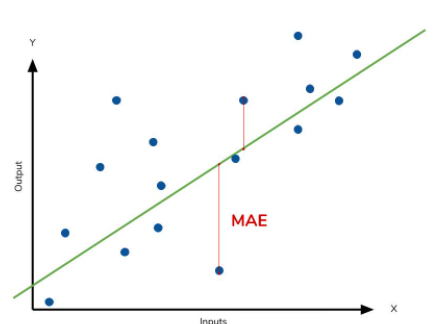

In [40]:
# 훈련 세트에 대한 예측을 만듭니다
train_prediction = knr.predict(train_input)
# 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(train_target, train_prediction)
print(mae)

35.76190476190476


## 과대적합 vs 과소적합

In [41]:
print(knr.score(train_input, train_target))

0.9698823289099255


In [42]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [43]:
print(knr.score(test_input, test_target))

0.974645996398761


## 확인문제

[  32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   40.   40.
   70.   70.   80.   85.  115.  135.  150.  225.  180.  197.  260.  260.
  300.  300.  514.  514.  514.  556.  840.  700.  690.  820.  820.  850.
  850. 1100. 1000. 1000.]


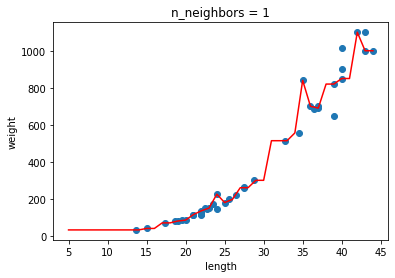

[  60.    60.    60.    60.    60.    60.    60.    60.    60.    60.
   60.    60.    70.6   79.6   79.6   95.   113.   123.   168.   174.
  193.   224.   248.   248.   248.   311.4  379.   582.   659.   659.
  694.2  723.   719.   709.   847.   847.   993.   990.  1010.  1010. ]


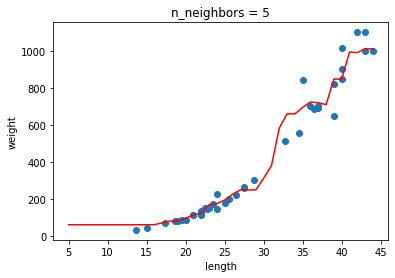

[ 81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5
  81.5  91.3 100.8 104.8 116.  128.5 148.  161.2 195.5 211.  211.  247.4
 247.4 347.5 453.5 551.  551.  645.5 700.5 700.5 739.1 785.  811.  882.5
 912.5 912.5 912.5 912.5]


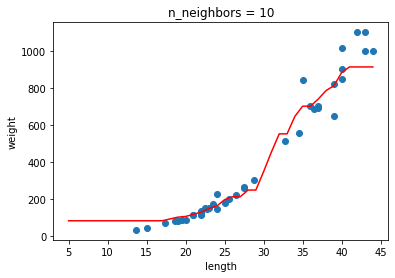

In [74]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)
#print (x)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)        ## 5부터 45를 입력하여 예측 수행 
    print (prediction)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction, color = 'red')
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()